<a href="https://colab.research.google.com/github/DevanshSaini18/Income-classifier/blob/main/Income_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

#### df_original -> original data no modifications


In [ ]:
#pip install opendatasets

In [ ]:
#import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler# sklearn.preprocessing.RobustScaler
from scipy import stats
from sklearn.decomposition import PCA

In [ ]:
# od.download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [ ]:
df_original = pd.read_csv("/content/adult.csv")

In [ ]:
print(df_original.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-los', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')


In [ ]:
df_original.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_original.describe()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-los     32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_original['Income'] = df_original['Income'].replace([">50K","<=50K"], [1,0])
df_original[["Income"]].value_counts()

Income
0         24720
1          7841
dtype: int64

In [ ]:
print(len(df_original))

32561


#### No null/missing values but they are filled with ?
#### No way to check duplicates


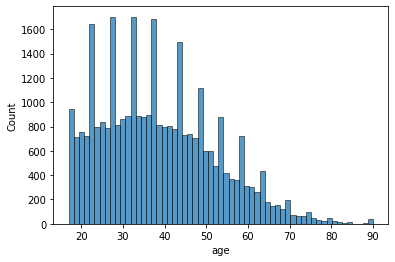

In [ ]:
sns.histplot(data=df_original[["age"]], x="age")

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df_original[["age"]] )
df_original[["age"]]  = scaler.transform(df_original[["age"]])

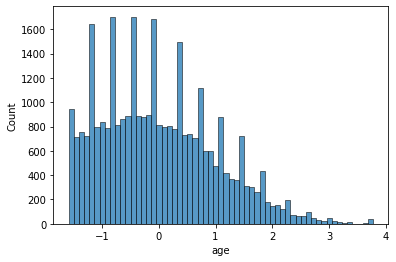

In [ ]:
sns.histplot(data=df_original[["age"]], x="age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


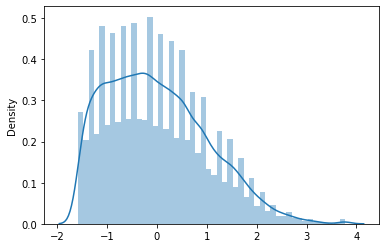

In [ ]:
sns.distplot(df_original[["age"]])

In [ ]:
# def replace_nan_with_mode(column_names):
#     global train_data
#     for column_name in column_names:
#         mode_value = train_data[column_name].mode()[0]
#         train_data[column_name] = train_data[column_name].fillna(mode_value)
#     return

# li = ["Ever_Married","Graduated","Profession","Family_Size","Var_1","Work_Experience"]
# replace_nan_with_mode(li)

#### Better to drop without-pay and Never-worked

In [ ]:
df_original[["workclass"]].value_counts()


workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

In [ ]:
df_original.drop(df_original.index[df_original['workclass'] == 'Without-pay'], inplace = True)
df_original.drop(df_original.index[df_original['workclass'] == 'Never-worked'], inplace = True)
df_original[["workclass"]].value_counts()

workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
dtype: int64

In [ ]:
# def replace_nan_with_mode(column_names,df):
#     global train_data
#     for column_name in column_names:
#         mode_value = train_data[column_name].mode()[0]
#         train_data[column_name] = train_data[column_name].fillna(mode_value)
#     return

# li = ["workclass"]
# replace_nan_with_mode(li,)

#### Better 

In [ ]:
df_original[["education"]].value_counts()

education   
HS-grad         10491
Some-college     7286
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1174
Assoc-acdm       1066
10th              931
7th-8th           644
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
dtype: int64

#### Instead of dropping data binned them into another type of categories

In [ ]:
li1 = ["Doctorate","Prof-school"]
li2 = ['11th','10th',"9th","12th"]
li3 = ["5th-6th","1st-4th","Preschool","7th-8th"]
df_original['education'] = df_original['education'].replace(li1, "PHD lvl")
df_original['education'] = df_original['education'].replace(li2, "High school")
df_original['education'] = df_original['education'].replace(li3, "Lower school")
df_original["education"].value_counts()

HS-grad         10491
Some-college     7286
Bachelors        5355
High school      3052
Masters          1723
Assoc-voc        1382
Lower school     1196
Assoc-acdm       1066
PHD lvl           989
Name: education, dtype: int64

#### Married-civ-spouse corresponds to a civilian spouse
#### Married-AF-spouse is a spouse in the Armed Forces

In [ ]:
df_original["marital-status"].value_counts()

Married-civ-spouse       14967
Never-married            10674
Divorced                  4442
Separated                 1025
Widowed                    992
Married-spouse-absent      417
Married-AF-spouse           23
Name: marital-status, dtype: int64

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


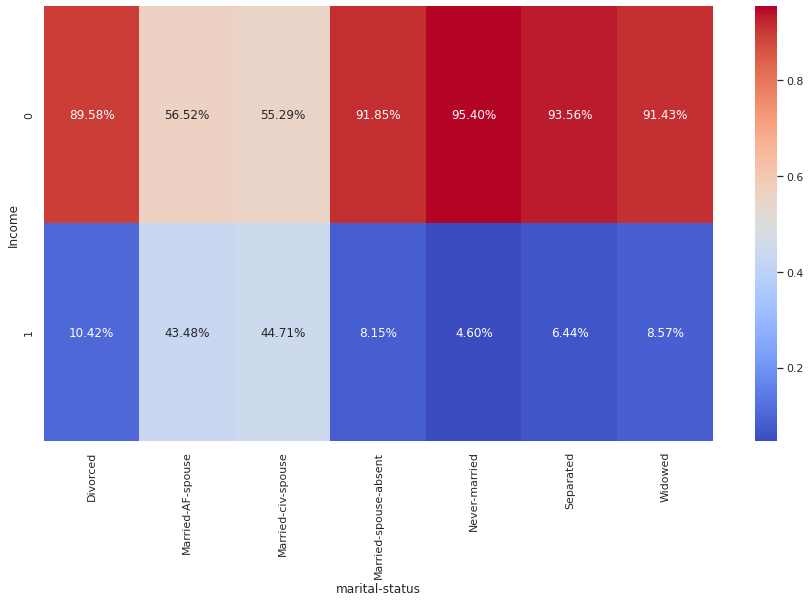

In [ ]:
df_marital_status = df_original[["marital-status","Income"]]
df1 = df_marital_status[["marital-status","Income"]].groupby(["marital-status", "Income"]).size().unstack(level=0)
print(df_marital_status["marital-status"].unique())
for profession in df_marital_status["marital-status"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [ ]:
df_original["marital-status"] = df_original["marital-status"].replace(["Married-civ-spouse","Married-AF-spouse"],[1,1])
df_original["marital-status"] = df_original["marital-status"] == 1
df_original["marital-status"] = df_original["marital-status"].replace([True,False],[1,0])
df_original["marital-status"].value_counts()

0    17550
1    14990
Name: marital-status, dtype: int64

#### Occupation has missing values

In [ ]:
df_original["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4098
Exec-managerial      4066
Adm-clerical         3767
Sales                3650
Other-service        3294
Machine-op-inspct    2001
?                    1836
Transport-moving     1596
Handlers-cleaners    1369
Farming-fishing       988
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

#### Doing no binning since I believe this feature would be one of most important features

In [ ]:
def replace_nan_with_mode(column_names,df):
    for column_name in df.columns:
        mode_value = df[column_name].mode()[0]
        df[column_name] = df[column_name].replace("?", mode_value)
    return

li = ["occupation"]
replace_nan_with_mode(li,df_original)
df_original["occupation"].value_counts()

Prof-specialty       5976
Craft-repair         4098
Exec-managerial      4066
Adm-clerical         3767
Sales                3650
Other-service        3294
Machine-op-inspct    2001
Transport-moving     1596
Handlers-cleaners    1369
Farming-fishing       988
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

#### WTF feature no idea so doing nothing

In [ ]:
df_original['relationship'].value_counts()

Husband           13189
Not-in-family      8304
Own-child          5058
Unmarried          3444
Wife               1564
Other-relative      981
Name: relationship, dtype: int64

#### Might play an important role if distrimination exist so doing nothing

In [ ]:
df_original["race"].value_counts()

White                 27799
Black                  3121
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
df_original[["race"]] = df_original[["race"]] == "White"
df_original["race"].head()

0     True
1     True
2     True
3    False
4    False
Name: race, dtype: bool

In [ ]:
# df_original["race"] = df_original["race"] == "White"
df_original["race"] = df_original["race"].replace([True,False],[1,0])
df_original["race"].value_counts()
# df_original['native-country']=  df_original['native-country']=="United-States"
# df_original['native-country'] = df_original['native-country'].replace([True,False], [1,0])
# df_original['native-country'].value_counts()

1    27799
0     4741
Name: race, dtype: int64

In [ ]:
df_original['sex'] = df_original['sex'].replace(["Male","Female"], [1,0])
df_original[["sex"]].value_counts()

sex
1      21776
0      10764
dtype: int64

#### imp feature

### capital-gain

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


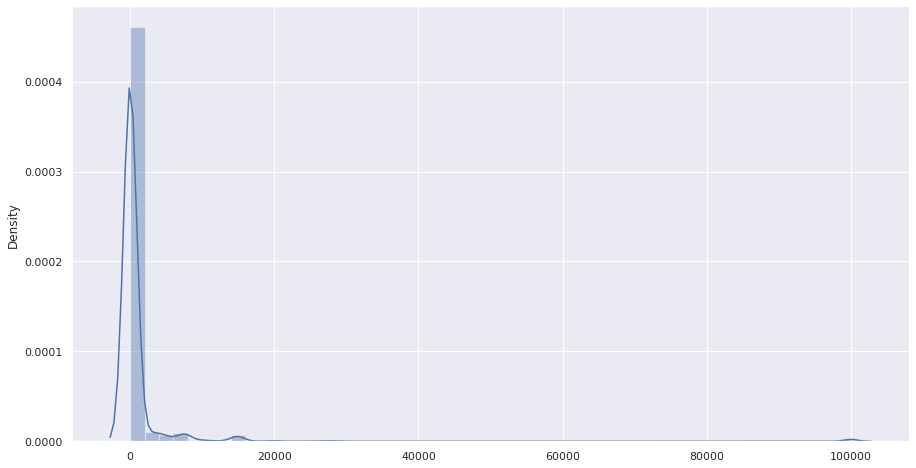

In [ ]:
# capital-gain
sns.distplot(df_original[["capital-gain"]])

<!-- #### Handling skewness in capital-gain -> remove outliers automatically skewness would removed -->
#### Drop capital-gain and capital-los 

In [ ]:
# df_original.drop(['capital-gain', 'capital-los'], axis = 1, inplace = True) 
# df_original.head()

### hours-per-week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


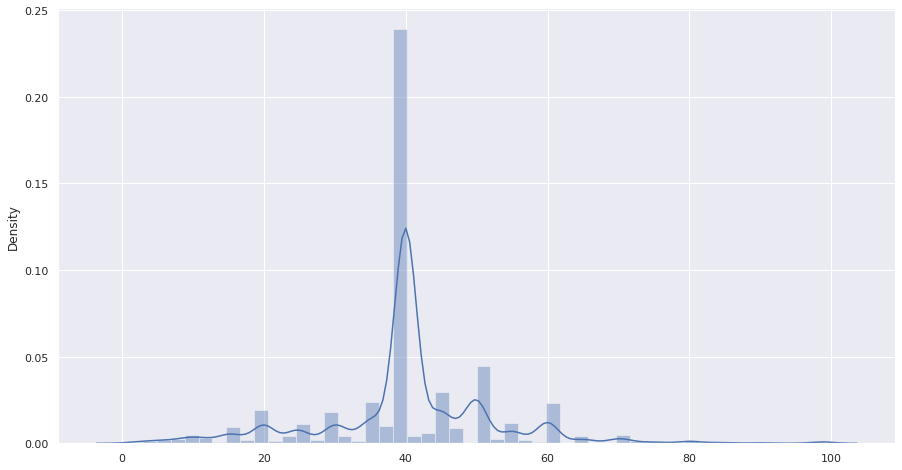

In [ ]:
# capital-los
sns.distplot(df_original[["hours-per-week"]])

#### handling skewness

In [ ]:
#df_original[["hours-per-week"]] = np.log(df_original["hours-per-week"])
print(df_original[["hours-per-week"]].skew())
#sns.distplot(df_original[["capital-los"]])
print("No skewness")

hours-per-week    0.229071
dtype: float64
No skewness


#### standard sclar

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


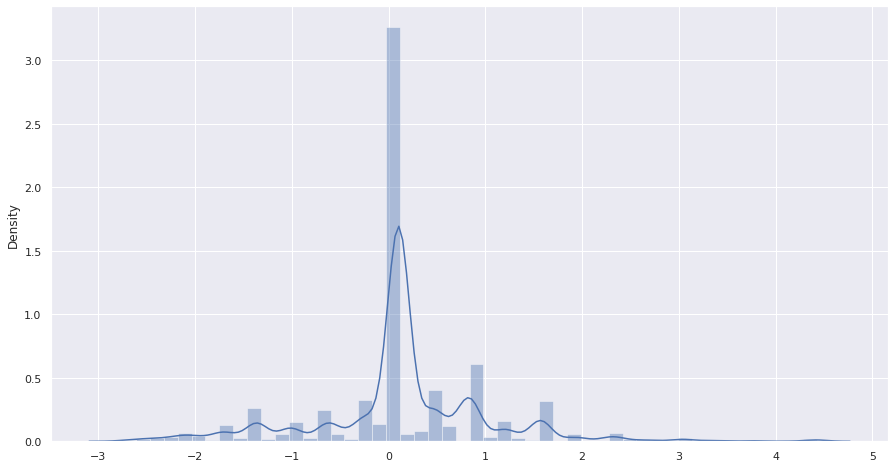

In [ ]:
# scaler.fit(df_original[["capital-gain"]] )
df_original[["hours-per-week"]]  = scaler.transform(df_original[["hours-per-week"]])
# capital-gain
sns.distplot(df_original[["hours-per-week"]])

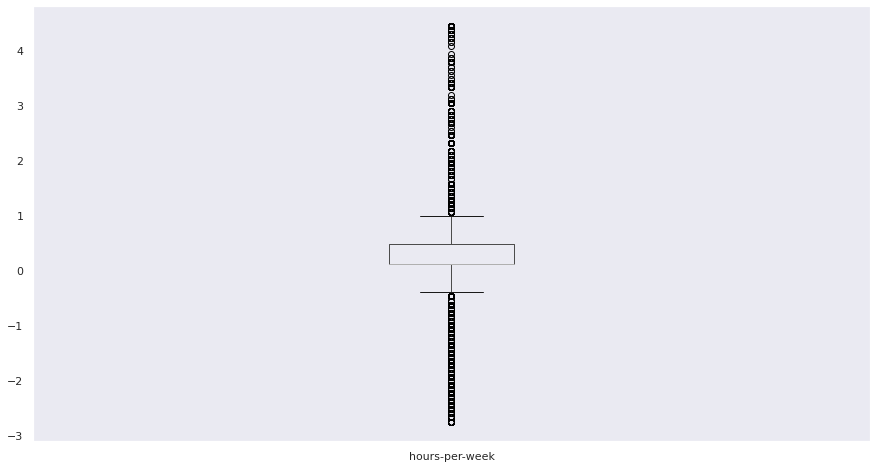

In [ ]:
df_original[["hours-per-week"]].boxplot( grid = False)

In [ ]:
# # Removing outliers
# # IQR
# Q1 = np.percentile(df_original[["hours-per-week"]], 25, 
#                    interpolation = 'midpoint') 
  
# Q3 = np.percentile(df_original[["hours-per-week"]], 75,
#                    interpolation = 'midpoint') 
# IQR = Q3 - Q1 
  
# print("Old Shape: ", df_original.shape) 
  
# # Upper bound
# upper = np.where(df_original[["hours-per-week"]] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df_original[["hours-per-week"]] <= (Q1-1.5*IQR))
  
# ''' Removing the Outliers '''
# df_original.drop(upper[0], inplace = True)
# df_original.drop(lower[0], inplace = True)
  
# print("New Shape: ", df_original.shape) 

In [ ]:
df_original["native-country"].value_counts()

United-States                 29733
Mexico                          643
Philippines                     197
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
df_marital_status = df_original[["native-country","Income"]]
df1 = df_marital_status[["native-country","Income"]].groupby(["native-country", "Income"]).size().unstack(level=0)
print(df_marital_status["native-country"].unique())
for profession in df_marital_status["native-country"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [ ]:
df1

native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
Income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.631579,0.677686,0.733333,0.966102,0.736842,0.971429,0.857143,0.915094,0.666667,0.586207,0.678832,0.724138,0.953125,0.909091,NaN,0.923077,0.7,0.769231,0.6,0.581395,0.791667,0.657534,0.876543,0.612903,0.888889,0.948678,0.941176,NaN,0.935484,0.690355,0.8,0.891892,0.894737,0.75,0.8,0.607843,0.833333,0.894737,0.75391,0.925373,0.625
1,0.368421,0.322314,0.266667,0.033898,0.263158,0.028571,0.142857,0.084906,0.333333,0.413793,0.321168,0.275862,0.046875,0.090909,NaN,0.076923,0.3,0.230769,0.4,0.418605,0.208333,0.342466,0.123457,0.387097,0.111111,0.051322,0.058824,NaN,0.064516,0.309645,0.2,0.108108,0.105263,0.25,0.2,0.392157,0.166667,0.105263,0.24609,0.074627,0.375


In [ ]:
dict1 = dict()
for column in df_original["native-country"].unique():
    if df1[column][1]<10/100:
        dict1[column] = 1
    elif df1[column][1]>=10/100 and df1[column][1]<20/100:
        dict1[column] = 2
    elif df1[column][1]>=20/100 and df1[column][1]<30/100:
        dict1[column] = 3
    elif df1[column][1]>=30/100 and df1[column][1]<40/100:
        dict1[column] = 4
    else:
        dict1[column] = 5

print(dict1)

{'United-States': 3, 'Cuba': 3, 'Jamaica': 2, 'India': 5, 'Mexico': 1, 'South': 3, 'Puerto-Rico': 2, 'Honduras': 1, 'England': 4, 'Canada': 4, 'Germany': 4, 'Iran': 5, 'Philippines': 4, 'Italy': 4, 'Poland': 3, 'Columbia': 1, 'Cambodia': 4, 'Thailand': 2, 'Ecuador': 2, 'Laos': 2, 'Taiwan': 4, 'Haiti': 1, 'Portugal': 2, 'Dominican-Republic': 1, 'El-Salvador': 1, 'France': 5, 'Guatemala': 1, 'China': 3, 'Japan': 4, 'Yugoslavia': 4, 'Peru': 1, 'Outlying-US(Guam-USVI-etc)': 5, 'Scotland': 3, 'Trinadad&Tobago': 2, 'Greece': 3, 'Nicaragua': 1, 'Vietnam': 1, 'Hong': 4, 'Ireland': 3, 'Hungary': 3, 'Holand-Netherlands': 5}


In [ ]:
li1 = []
li2 = []
for key in (dict1):
    li1.append(key)
    li2.append(dict1[key])
print(li1)
print(li2)

df_original["native-country"] = df_original["native-country"].replace(li1,li2)
df_original["native-country"].value_counts()

['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']
[3, 3, 2, 5, 1, 3, 2, 1, 4, 4, 4, 5, 4, 4, 3, 1, 4, 2, 2, 2, 4, 1, 2, 1, 1, 5, 1, 3, 4, 4, 1, 5, 3, 2, 3, 1, 1, 4, 3, 3, 5]


3    30121
1     1131
4      786
2      315
5      187
Name: native-country, dtype: int64

[3 2 5 1 4]


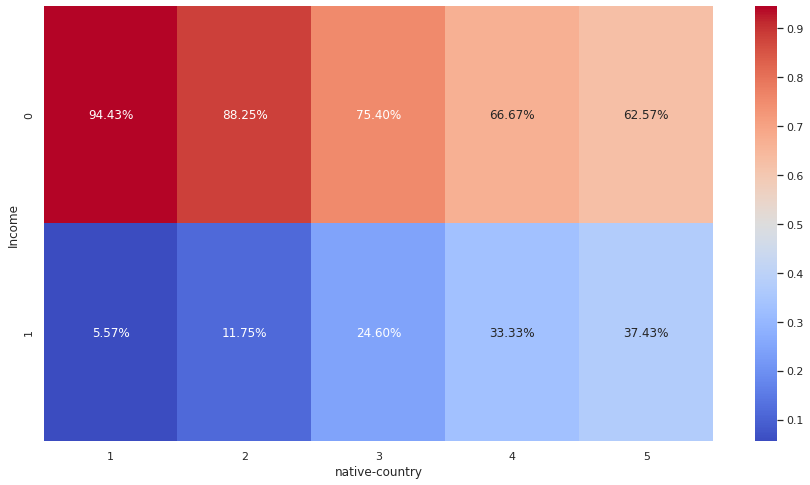

In [ ]:
df_temp = df_original[["native-country","Income"]]
df1 = df_temp[["native-country","Income"]].groupby(["native-country", "Income"]).size().unstack(level=0)
print(df_temp["native-country"].unique())
for profession in df_temp["native-country"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [ ]:
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,0.030671,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,1,1,2174,0,0.103983,3,0
1,0.837109,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,1,1,0,0,-1.875457,3,0
2,-0.042642,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,1,1,0,0,0.103983,3,0
3,1.057047,Private,234721,High school,7,1,Handlers-cleaners,Husband,0,1,0,0,0.103983,3,0
4,-0.775768,Private,338409,Bachelors,13,1,Prof-specialty,Wife,0,0,0,0,0.103983,3,0


In [ ]:
df_original['education-num-bins'] = pd.cut(x=df_original['education-num'], bins=[0,5,10, 12,17],labels=[1, 2, 3, 4])


In [ ]:
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income,education-num-bins
0,0.030671,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,1,1,2174,0,0.103983,3,0,4
1,0.837109,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,1,1,0,0,-1.875457,3,0,4
2,-0.042642,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,1,1,0,0,0.103983,3,0,2
3,1.057047,Private,234721,High school,7,1,Handlers-cleaners,Husband,0,1,0,0,0.103983,3,0,2
4,-0.775768,Private,338409,Bachelors,13,1,Prof-specialty,Wife,0,0,0,0,0.103983,3,0,4


In [ ]:
df = df_original["fnlwgt"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


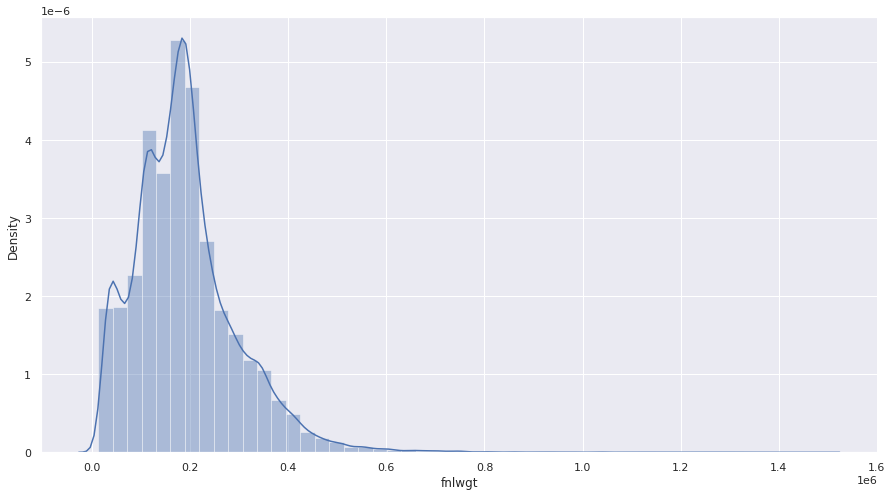

In [ ]:
sns.distplot(df)

#### Doing label encoding in education


In [ ]:
df_original["education"].value_counts()

HS-grad         10491
Some-college     7286
Bachelors        5355
High school      3052
Masters          1723
Assoc-voc        1382
Lower school     1196
Assoc-acdm       1066
PHD lvl           989
Name: education, dtype: int64

In [ ]:
df = df_original[["education","education-num"]].groupby(["education"]).mean()
df

,education-num
education,
Assoc-acdm,12.000000
Assoc-voc,11.000000
Bachelors,13.000000
HS-grad,9.000000
High school,6.500000
Lower school,3.312709
Masters,14.000000
PHD lvl,15.417594
Some-college,10.000000


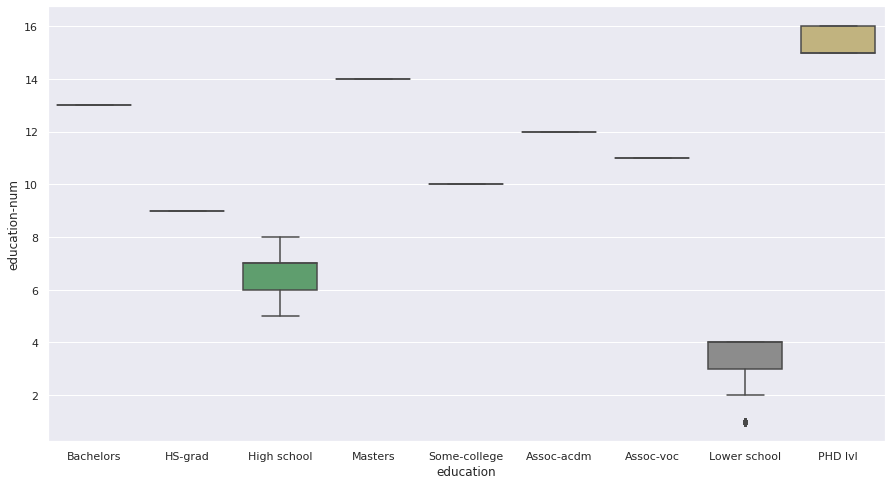

In [ ]:
sns.boxplot(x = 'education' , y = 'education-num' , data = df_original)

#### Variable to be one hot encoded are workclass,education, martial-status,occupation

In [ ]:
df_original[["workclass"]].value_counts()

workclass       
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
dtype: int64

In [ ]:
df_original[["marital-status"]].value_counts()

marital-status
0                 17550
1                 14990
dtype: int64

In [ ]:
df_original[["occupation"]].value_counts()

occupation       
Prof-specialty       5976
Craft-repair         4098
Exec-managerial      4066
Adm-clerical         3767
Sales                3650
Other-service        3294
Machine-op-inspct    2001
Transport-moving     1596
Handlers-cleaners    1369
Farming-fishing       988
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

In [ ]:
li = ["workclass","marital-status","occupation"]

In [ ]:
# creating initial dataframe

def dummy_var(columns):
    global df_original
    for column in columns:
        df = pd.DataFrame(df_original, columns=[column])
        # generate binary values using get_dummies
        dum_df = pd.get_dummies(df, columns=[column] )
        df_original = df_original.join(dum_df)
        #df_original.drop([column], axis = 1, inplace = True) 
dummy_var(li)

In [ ]:
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income,education-num-bins,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital-status_0,marital-status_1,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.030671,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,1,1,2174,0,0.103983,3,0,4,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.837109,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,1,1,0,0,-1.875457,3,0,4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.042642,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,1,1,0,0,0.103983,3,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.057047,Private,234721,High school,7,1,Handlers-cleaners,Husband,0,1,0,0,0.103983,3,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.775768,Private,338409,Bachelors,13,1,Prof-specialty,Wife,0,0,0,0,0.103983,3,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
len(df_original.columns)

38

In [ ]:
df_original.to_csv(r'/content/final_adult.csv', index = False, header = True)

#### first drop the req cells then run below cells